#***Linear Regression to analyze the relationship between Cancer Data(mortality, incidence) and Socio-Economic Factors***

In [86]:
#importing the basic required libraries
import numpy as np
import pandas as pd

##Reading data from the given data format(excel file)

In [87]:
from google.colab import files 
uploaded= files.upload() #uploading the files

Saving death .xlsx to death  (1).xlsx
Saving incd.xlsx to incd (1).xlsx
Saving merged_data.xlsx to merged_data (1).xlsx


In [88]:
import io
#creating dataframes from the excel files
df_death=pd.read_excel(io.BytesIO(uploaded['death .xlsx'])) 
df_incd=pd.read_excel(io.BytesIO(uploaded['incd.xlsx']))
df_socioeco=pd.read_excel(io.BytesIO(uploaded['merged_data.xlsx']))

In [89]:
df_death.head()

,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,United States,0,No,46,45.9,46.1,157376,falling,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4
3,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,**,**,**,**
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8


In [90]:
df_incd.head()

,County,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,"US (SEER+NPCR)(1,10)",0,62.4,62.3,62.6,214614,falling,-2.5,-3,-2
1,"Autauga County, Alabama(6,10)",1001,74.9,65.1,85.7,43,stable,0.5,-14.9,18.6
2,"Baldwin County, Alabama(6,10)",1003,66.9,62.4,71.7,170,stable,3,-10.2,18.3
3,"Barbour County, Alabama(6,10)",1005,74.6,61.8,89.4,25,stable,-6.4,-18.3,7.3
4,"Bibb County, Alabama(6,10)",1007,86.4,71,104.2,23,stable,-4.5,-31.4,32.9


In [91]:
df_socioeco.head()

,Unnamed: 0,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,All_With,All_Without,fips_x,Incidence_Rate,Avg_Ann_Incidence,recent_trend,fips_y,Mortality_Rate,Avg_Ann_Deaths
0,0,AK,"Aleutians East Borough, Alaska",553,334,219,2013,61518.0,72639.0,31250.0,54750.0,62679.0,51250.0,876,1317,566,540,1442,1857,2013,*,3 or fewer,*,2013,*,*
1,1,AK,"Aleutians West Census Area, Alaska",499,273,226,2016,84306.0,97321.0,93750.0,48750.0,81250.0,77500.0,2470,769,1707,564,4177,1333,2016,*,3 or fewer,*,2016,*,*
2,2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326.0,87235.0,50535.0,53935.0,63757.0,53926.0,120747,23245,122426,21393,243173,44638,2020,61.5,131,stable,2020,47.3,96
3,3,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012.0,92647.0,73661.0,41594.0,110625.0,160114.0,6396,2708,6627,1774,13023,4482,2050,62.7,6,stable,2050,58.3,5
4,4,AK,"Bristol Bay Borough, Alaska",69,33,36,2060,79750.0,88000.0,NaN,63333.0,NaN,25625.0,419,124,349,67,768,191,2060,*,3 or fewer,*,2060,*,*


In [92]:
df_incd.columns

Index(['County', ' FIPS', 'Age-Adjusted Incidence Rate(Ê) - cases per 100,000',
       'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval',
       'Average Annual Count', 'Recent Trend',
       'Recent 5-Year Trend (ˆ) in Incidence Rates',
       'Lower 95% Confidence Interval.1', 'Upper 95% Confidence Interval.1'],
      dtype='object')

In [93]:
df_death .columns

Index(['County', 'FIPS', 'Met Objective of 45.5? (1)',
       'Age-Adjusted Death Rate',
       'Lower 95% Confidence Interval for Death Rate',
       'Upper 95% Confidence Interval for Death Rate',
       'Average Deaths per Year', 'Recent Trend (2)',
       'Recent 5-Year Trend (2) in Death Rates',
       'Lower 95% Confidence Interval for Trend',
       'Upper 95%  Confidence Interval for Trend'],
      dtype='object')

In [94]:
df_socioeco.columns

Index(['Unnamed: 0', 'State', 'AreaName', 'All_Poverty', 'M_Poverty',
       'F_Poverty', 'FIPS', 'Med_Income', 'Med_Income_White',
       'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic',
       'M_With', 'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without',
       'fips_x', 'Incidence_Rate', 'Avg_Ann_Incidence', 'recent_trend',
       'fips_y', 'Mortality_Rate', 'Avg_Ann_Deaths'],
      dtype='object')

##Cleaning and Preparing the Data for Analysis

###Merging the dataframes:

In [95]:
df_incd = df_incd.rename(columns={' FIPS': 'FIPS'})

In [96]:
merged_df = df_death .merge(df_incd, on="FIPS") #merging df_incd and df_death dataframes into merged_df

In [97]:
merged_df.head()

,County_x,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend,County_y,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,United States,0,No,46,45.9,46.1,157376,falling,-2.4,-2.6,-2.2,"US (SEER+NPCR)(1,10)",62.4,62.3,62.6,214614,falling,-2.5,-3,-2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6,"Perry County, Kentucky(7,9)",139.7,122.2,159.1,49,falling,-15,-26.3,-1.9
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4,"Powell County, Kentucky(7,9)",152.9,125.7,184.6,23,stable,8.2,-7.3,26.2
3,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,**,**,**,**,"North Slope Borough, Alaska(6,10)",153.4,95.2,229.4,6,stable,0.2,-34.3,52.7
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8,"Owsley County, Kentucky(7,9)",148.1,107.8,199.8,9,stable,10.6,-13.1,40.9


In [98]:
merged_df.columns

Index(['County_x', 'FIPS', 'Met Objective of 45.5? (1)',
       'Age-Adjusted Death Rate',
       'Lower 95% Confidence Interval for Death Rate',
       'Upper 95% Confidence Interval for Death Rate',
       'Average Deaths per Year', 'Recent Trend (2)',
       'Recent 5-Year Trend (2) in Death Rates',
       'Lower 95% Confidence Interval for Trend',
       'Upper 95%  Confidence Interval for Trend', 'County_y',
       'Age-Adjusted Incidence Rate(Ê) - cases per 100,000',
       'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval',
       'Average Annual Count', 'Recent Trend',
       'Recent 5-Year Trend (ˆ) in Incidence Rates',
       'Lower 95% Confidence Interval.1', 'Upper 95% Confidence Interval.1'],
      dtype='object')

In [99]:
merged_df = merged_df.rename(columns={'County_x': 'AreaName'})

In [100]:
df =  merged_df.merge(df_socioeco, on="AreaName") #merging merged_df and df_socioeco into the final dataframe(df)

In [101]:
df.head()

,AreaName,FIPS_x,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend,County_y,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,Unnamed: 0,State,All_Poverty,M_Poverty,F_Poverty,FIPS_y,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,All_With,All_Without,fips_x,Incidence_Rate,Avg_Ann_Incidence,recent_trend,fips_y,Mortality_Rate,Avg_Ann_Deaths
0,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6,"Perry County, Kentucky(7,9)",139.7,122.2,159.1,49,falling,-15,-26.3,-1.9,1083,KY,6894,2903,3991,21193,32667.0,31911.0,93000.0,NaN,NaN,NaN,11544,1921,11982,1944,23526,3865,21193,139.7,49,falling,21193,125.6,43
1,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4,"Powell County, Kentucky(7,9)",152.9,125.7,184.6,23,stable,8.2,-7.3,26.2,1085,KY,3392,1361,2031,21197,29736.0,30476.0,NaN,NaN,NaN,16688.0,5131,829,5551,714,10682,1543,21197,152.9,23,stable,21197,125.3,18
2,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,**,**,**,**,"North Slope Borough, Alaska(6,10)",153.4,95.2,229.4,6,stable,0.2,-34.3,52.7,16,AK,976,532,444,2185,72576.0,86250.0,107500.0,59554.0,126964.0,88563.0,4847,1248,2579,910,7426,2158,2185,153.4,6,stable,2185,124.9,5
3,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8,"Owsley County, Kentucky(7,9)",148.1,107.8,199.8,9,stable,10.6,-13.1,40.9,1081,KY,1710,810,900,21189,20985.0,20618.0,NaN,NaN,NaN,NaN,1879,247,2108,300,3987,547,21189,148.1,9,stable,21189,118.5,8
4,"Union County, Florida",12125,No,113.5,89.9,141.4,19,falling,-2.2,-4.3,0,"Union County, Florida(6,10)",203.7,172.4,239.1,35,stable,1.4,-10.3,14.6,376,FL,2002,814,1188,12125,39163.0,40244.0,28516.0,86071.0,NaN,NaN,4013,645,4612,749,8625,1394,12125,203.7,35,stable,12125,113.5,19


In [102]:
df.columns

Index(['AreaName', 'FIPS_x', 'Met Objective of 45.5? (1)',
       'Age-Adjusted Death Rate',
       'Lower 95% Confidence Interval for Death Rate',
       'Upper 95% Confidence Interval for Death Rate',
       'Average Deaths per Year', 'Recent Trend (2)',
       'Recent 5-Year Trend (2) in Death Rates',
       'Lower 95% Confidence Interval for Trend',
       'Upper 95%  Confidence Interval for Trend', 'County_y',
       'Age-Adjusted Incidence Rate(Ê) - cases per 100,000',
       'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval',
       'Average Annual Count', 'Recent Trend',
       'Recent 5-Year Trend (ˆ) in Incidence Rates',
       'Lower 95% Confidence Interval.1', 'Upper 95% Confidence Interval.1',
       'Unnamed: 0', 'State', 'All_Poverty', 'M_Poverty', 'F_Poverty',
       'FIPS_y', 'Med_Income', 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic', 'M_With',
       'M_Without', 'F_With', 'F_Without', 'All_With', 'Al

###Filtering the data required from dataframe:
While the dataframe contains a wealth of information, we shall limit our analysis to only the required variables in the data which will be helpful for our analysis.

In [103]:
selected_columns=['AreaName', 'Met Objective of 45.5? (1)', 'Age-Adjusted Death Rate',
       'Lower 95% Confidence Interval for Death Rate', 
       'Upper 95% Confidence Interval for Death Rate',
       'Average Deaths per Year', 'Recent Trend (2)',
       'Recent 5-Year Trend (2) in Death Rates',
       'Lower 95% Confidence Interval for Trend',
       'Upper 95%  Confidence Interval for Trend',
       'Age-Adjusted Incidence Rate(Ê) - cases per 100,000',
       'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval',
       'Average Annual Count', 'Recent Trend',
       'Recent 5-Year Trend (ˆ) in Incidence Rates',
       'Lower 95% Confidence Interval.1', 'Upper 95% Confidence Interval.1', 'All_Poverty', 'M_Poverty', 'F_Poverty', 'Med_Income', 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic', 'M_With',
       'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without', 
       'Incidence_Rate', 'Avg_Ann_Incidence', 'recent_trend',
       'Mortality_Rate', 'Avg_Ann_Deaths'] #list of all columns that will be relevanat to our analysis

In [104]:
df=df[selected_columns]

###Cleaning the data:

In [105]:
df=df.astype('str') #converting all values in df to strings

In [106]:
#removing all the trailing and leading spaces from the data values
for i in selected_columns:
  for j in range(0,len(df[i])):
     df[i][j]=str(df[i][j]).strip() 

In [107]:
#One hot encoding of the 'Met Objective of 45.5? (1)' column:
for j in range(0,len(df['Met Objective of 45.5? (1)'])):
     if df['Met Objective of 45.5? (1)'][j]=='Yes':
       df['Met Objective of 45.5? (1)'][j]=1
     if df['Met Objective of 45.5? (1)'][j]=='No':
       df['Met Objective of 45.5? (1)'][j]=(-1)

In [108]:
df = df.replace(',','', regex=True) #handling the redundant commas present in the numerical values

In [109]:
columns1=[ 'Age-Adjusted Death Rate',
       'Lower 95% Confidence Interval for Death Rate', 
       'Upper 95% Confidence Interval for Death Rate',
       'Average Deaths per Year', 
       'Recent 5-Year Trend (2) in Death Rates',
       'Lower 95% Confidence Interval for Trend',
       'Upper 95%  Confidence Interval for Trend',
       'Age-Adjusted Incidence Rate(Ê) - cases per 100,000',
       'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval',
       'Average Annual Count', 
       'Recent 5-Year Trend (ˆ) in Incidence Rates',
       'Lower 95% Confidence Interval.1', 'Upper 95% Confidence Interval.1', 'All_Poverty', 'M_Poverty', 'F_Poverty', 'Med_Income', 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic', 'M_With',
       'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without', 
       'Incidence_Rate', 'Avg_Ann_Incidence', 
       'Mortality_Rate', 'Avg_Ann_Deaths'] #columns1 is a list of all columns of df with numerical values stored in them

In [110]:
df=df.replace(to_replace="#",value=np.nan, regex=True) #removing incomplete data represented by '#' symbols in the datframe

In [111]:
#handling the noise in the data
for i in df.columns:
  for j in range(0,len(df[i])):
    if df.loc[j,i]=='**':
      df.loc[j,i]=np.nan
    if df.loc[j,i]=='*':
      df.loc[j,i]=np.nan
    if df.loc[j,i]=='_':
      df.loc[j,i]=np.nan
    if df.loc[j,i]=='__' :
      df.loc[j,i]=np.nan
    if df.loc[j,i]==None:
      df.loc[j,i]=np.nan
    if df.loc[j,i]=='nan':
      df.loc[j,i]=np.nan
    if df.loc[j,i]=='3 or fewer':
      df.loc[j,i]=1.5

In [112]:
for i in columns1: 
  df[i]=df[i].astype('float') #converting all values in the columns1 of df to float

###Handling the NaN values in the data:

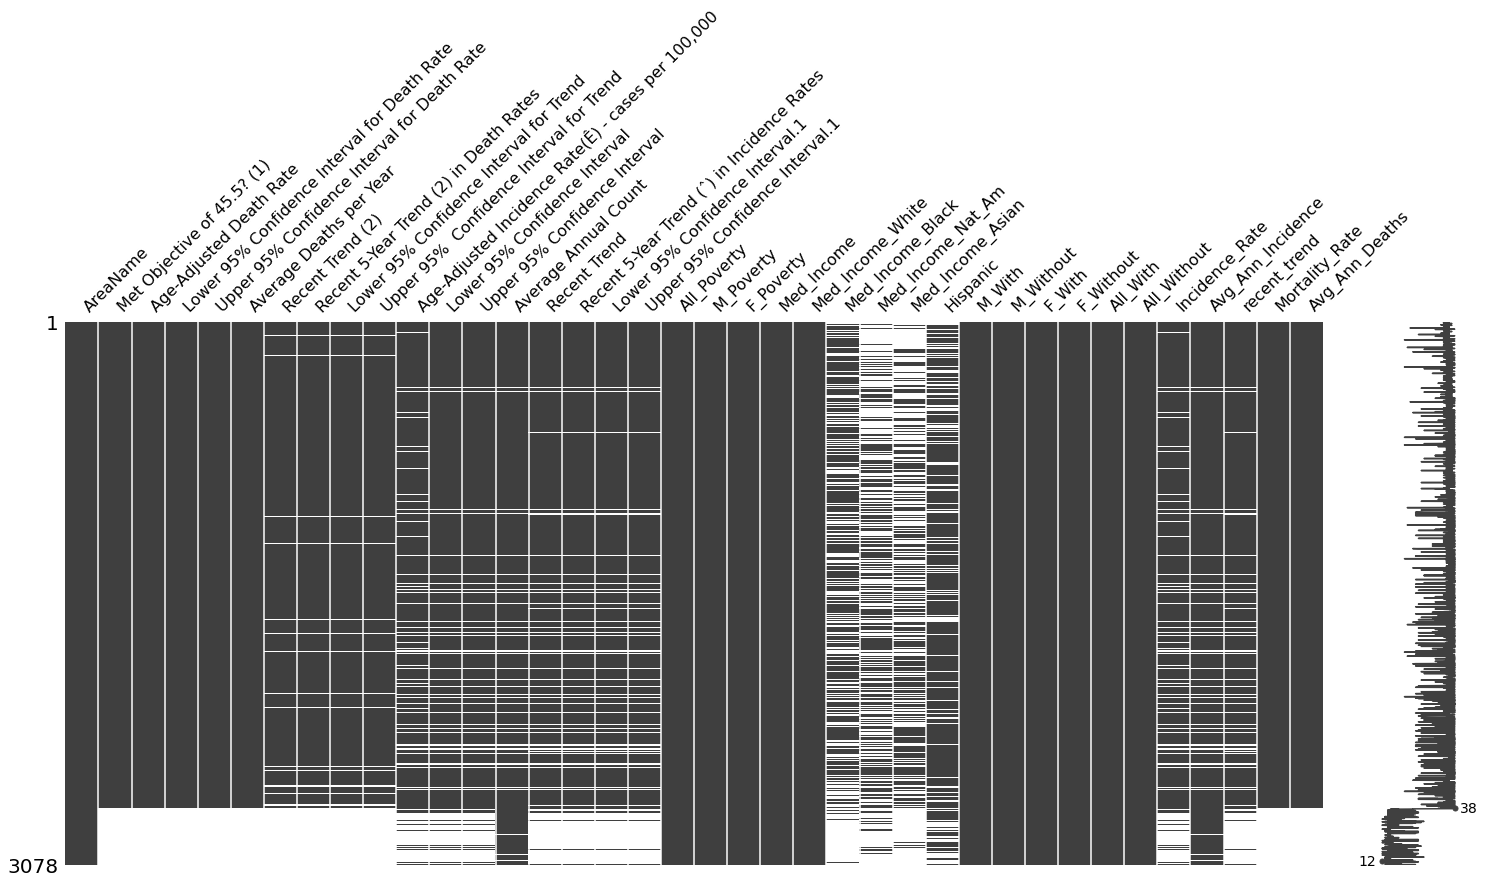

In [113]:
import missingno as msno 
msno.matrix(df) #visualizing the missing data/NaN values in the dataframe

From the above matrix, we infer that:


*   The rows at the end(rows after and including row 2757) contain lot of NaN values in a significant number of columns. Hence the best way in which we can handle them by deleting these rows completely.
*   The columns 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian' have a significant amount NaN values overall.
*   Columns with missing values (even after deleting these end rows starting row 2757): 'recent_trend', 'Recent Trend (2)', 'Recent 5-Year Trend (2) in Death Rates', 'Recent Trend', 'Recent 5-Year Trend (ˆ) in Incidence Rates', 'Lower 95% Confidence Interval for Trend', 'Upper 95%  Confidence Interval for Trend', 'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval', 'Lower 95% Confidence Interval.1', 'Upper 95% Confidence Interval.1', 'Age-Adjusted Incidence Rate(Ê) - cases per 100,000', 'Incidence_Rate', 'Avg_Ann_Incidence', 'Average Annual Count', 'Med_Income_White', 'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic'.



In [114]:
#The rows at the end contain lot of NaN values in a significant number of columns. We can handle them by deleting these rows (rows after and including 2757).
df = df.iloc[0:2756]

In [115]:
print("variance in 'Med_Income_White':",np.var(df['Med_Income_White'], axis = None))
print("variance in 'Med_Income_Black':",np.var(df['Med_Income_Black'], axis = None))
print("variance in 'Med_Income_Asian':",np.var(df['Med_Income_Asian'], axis = None))
print("variance in 'Med_Income_Nat_Am':",np.var(df['Med_Income_Nat_Am'], axis = None))
print("variance in 'Hispanic':",np.var(df['Hispanic'], axis = None))


#as the variance of these columns is too high, we cant replace the missing values using the mean

variance in 'Med_Income_White': 148162038.07929763
variance in 'Med_Income_Black': 315525626.765567
variance in 'Med_Income_Asian': 1180436124.1542635
variance in 'Med_Income_Nat_Am': 565789635.0127596
variance in 'Hispanic': 256023548.8769799


In [116]:
print("variance in 'Lower 95% Confidence Interval for Trend':",np.var(df['Lower 95% Confidence Interval for Trend'], axis = None))
print("variance in 'Upper 95%  Confidence Interval for Trend':",np.var(df['Upper 95%  Confidence Interval for Trend'], axis = None))
print("variance in 'Lower 95% Confidence Interval.1':",np.var(df['Lower 95% Confidence Interval.1'], axis = None))
print("variance in 'Lower 95% Confidence Interval':",np.var(df['Lower 95% Confidence Interval'], axis = None))
print("variance in 'Incidence_Rate':",np.var(df['Incidence_Rate'], axis = None))
print("variance in 'Age-Adjusted Incidence Rate(Ê) - cases per 100,000':",np.var(df['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'], axis = None))
print("variance in 'Upper 95% Confidence Interval':",np.var(df['Upper 95% Confidence Interval'], axis = None))
print("variance in 'Upper 95% Confidence Interval.1':",np.var(df['Upper 95% Confidence Interval.1'], axis = None))
print("variance in 'Avg_Ann_Incidence':",np.var(df['Avg_Ann_Incidence'], axis = None))
print("variance in 'Average Annual Count':",np.var(df['Average Annual Count'], axis = None))
print("variance in 'Hispanic':",np.var(df['Hispanic'], axis = None))

variance in 'Lower 95% Confidence Interval for Trend': 12.039469645316828
variance in 'Upper 95%  Confidence Interval for Trend': 9.639010432449513
variance in 'Lower 95% Confidence Interval.1': 138.41030966733874
variance in 'Lower 95% Confidence Interval': 253.51050999109196
variance in 'Incidence_Rate': 309.4452683433609
variance in 'Age-Adjusted Incidence Rate(Ê) - cases per 100,000': 309.5143592274641
variance in 'Upper 95% Confidence Interval': 473.3127296383172
variance in 'Upper 95% Confidence Interval.1': 443.0981572320819
variance in 'Avg_Ann_Incidence': 32906.55473196175
variance in 'Average Annual Count': 32906.55473196175
variance in 'Hispanic': 256023548.8769799


From the above analysis, we infer that:


*   The variance is very low in: 'Upper 95%  Confidence Interval for Trend', 'Lower 95% Confidence Interval for Trend'. And hence it would be apt to replace the NaN values in these columns with the mean value of the respective columns.


In [117]:
df['Upper 95% Confidence Interval for Trend']=df['Upper 95%  Confidence Interval for Trend'].replace(to_replace=np.nan,value=np.mean(df['Upper 95%  Confidence Interval for Trend'], axis=None), regex=True)

In [118]:
df['Lower 95% Confidence Interval for Trend']=df['Lower 95% Confidence Interval for Trend'].replace(to_replace=np.nan,value=np.mean(df['Lower 95% Confidence Interval for Trend'], axis=None), regex=True)

####Imputing the missing values in the other columns using the datawig's SimpleImputer(which uses some simple default encoders and featurizers that usually yield decent imputation quality):



Given a data frame, a model is trained to predict observed values in label column using values observed in other columns.

In [119]:
!pip install datawig
import datawig

# impute missing values using datawig's SimpleImputer
df[columns1] = datawig.SimpleImputer.complete(df[columns1])

  Using cached numpy-1.14.6-cp37-cp37m-manylinux1_x86_64.whl (13.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.2
    Uninstalling numpy-1.21.2:
      Successfully uninstalled numpy-1.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.18.2 requires numpy>=1.17, but you have numpy 1.14.6 which is incompatible.
xarray 0.18.2 requires pandas>=1.0, but you have pandas 0.25.3 which is incompatible.
tifffile 2021.8.30 requires numpy>=1.15.1, but you have numpy 1.14.6 which is incompatible.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.14.6 which is incompatible.
spacy 2.2.4 requires numpy>=1.15.0, but you have numpy 1.14.6 which is incompatible.
seaborn 0.11.1 requires numpy>=1.15, but you have numpy 1.14.6 which is incompatible.
ray 1.6.0 requires numpy>=1.16; python_version < "3.9", but you have numpy 1.14

##Exploratory Data Analysis

In [ ]:
for i in columns1: 
  df[i]=df[i].astype('float') #converting all values in the columns1 of df to float

In [ ]:
df.shape

(2756, 39)

* Dataset comprises of 2756 observations and 39 characteristics/variables.
* Out of which 21 are dependent variables and the rest 17 are independent variables.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2756 entries, 0 to 2755
Data columns (total 39 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   AreaName                                            2756 non-null   object 
 1   Met Objective of 45.5? (1)                          2756 non-null   object 
 2   Age-Adjusted Death Rate                             2756 non-null   float64
 3   Lower 95% Confidence Interval for Death Rate        2756 non-null   float64
 4   Upper 95% Confidence Interval for Death Rate        2756 non-null   float64
 5   Average Deaths per Year                             2756 non-null   float64
 6   Recent Trend (2)                                    2640 non-null   object 
 7   Recent 5-Year Trend (2) in Death Rates              2756 non-null   float64
 8   Lower 95% Confidence Interval for Trend             2756 non-null   float64
 9

Inferances:
* All columns except 'recent_trend', 'Recent Trend','Recent Trend (2)', 'AreaName','Met Objective of 45.5? (1)' have only float and integer values.
* No variable column has null/missing values. (i.e. we have already handled all the NaN/missing values)

In [ ]:
df.describe()

,Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,All_Poverty,M_Poverty,F_Poverty,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Mortality_Rate,Avg_Ann_Deaths,Upper 95% Confidence Interval for Trend
count,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2.756000e+03,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2.756000e+03,2756.000000,2.756000e+03,2756.000000,2.756000e+03,2.756000e+03,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000
mean,53.218433,42.824601,66.307112,55.847605,-0.995951,-2.750227,0.871823,70.050652,58.125486,84.591784,76.453278,-1.580576,-17.517323,19.540402,1.689800e+04,7580.367199,9317.632438,46682.593977,49351.331277,35808.549436,41639.944628,70614.902091,40266.583035,4.620703e+04,7696.613933,4.982188e+04,6631.055152,9.602891e+04,1.432767e+04,70.047027,76.707993,53.218433,55.847605,0.857083
std,14.043145,12.384423,18.622392,128.480911,2.337865,3.396603,3.045752,16.926548,15.595415,21.165276,177.577779,7.058355,11.364731,20.323173,5.781495e+04,26194.185501,31635.211833,12155.945756,12174.391870,16342.185952,18739.304946,32050.917267,14842.545182,1.368568e+05,30452.348008,1.487163e+05,26181.820974,2.855353e+05,5.660413e+04,16.872443,176.759862,14.043145,128.480911,3.039187
min,11.600000,8.000000,14.400000,3.000000,-33.400000,-60.900000,-10.300000,13.500000,7.600000,18.300000,1.500000,-38.600000,-69.000000,-11.400000,1.790000e+02,78.000000,101.000000,19328.000000,19340.000000,2499.000000,2499.000000,2499.000000,-11605.187656,8.550000e+02,95.000000,1.002000e+03,68.000000,1.901000e+03,1.890000e+02,13.500000,1.500000,11.600000,3.000000,-10.300000
25%,43.700000,34.375000,53.300000,10.000000,-1.500000,-3.000000,-0.300000,59.500000,47.700000,71.200000,14.000000,-5.200000,-23.900000,5.300000,2.323750e+03,1051.500000,1298.250000,38697.250000,41393.500000,25330.520474,31267.687575,52987.911136,31875.000000,6.077000e+03,970.000000,6.325750e+03,843.750000,1.239025e+04,1.831000e+03,59.675000,15.000000,43.700000,10.000000,-0.200000
50%,52.600000,42.900000,64.200000,21.000000,-0.800000,-2.200000,0.700000,69.753217,58.700000,83.500000,29.000000,-1.200000,-16.600000,15.300000,5.014000e+03,2224.500000,2781.000000,45019.500000,47346.500000,31936.500000,38744.206560,66469.379691,37813.000000,1.264700e+04,2032.500000,1.332450e+04,1781.500000,2.602150e+04,3.794000e+03,69.700000,30.000000,52.600000,21.000000,0.700000
75%,61.200000,50.800000,77.100000,48.000000,-0.100000,-1.400000,1.600000,79.100000,67.600000,95.300000,64.000000,1.400000,-9.500000,26.200000,1.193225e+04,5374.000000,6663.000000,52108.250000,54417.500000,42390.978770,48400.354827,82244.508343,45833.000000,3.208375e+04,4952.250000,3.444275e+04,4336.000000,6.650525e+04,9.297250e+03,79.100000,64.000000,61.200000,48.000000,1.500000
max,125.600000,108.900000,194.700000,2876.000000,31.100000,6.900000,78.100000,203.700000,172.400000,239.100000,3701.000000,39.600000,12.800000,179.300000,1.800265e+06,823612.000000,976653.000000,123453.000000,125761.000000,170195.000000,250001.000000,471037.051953,223750.000000,3.904322e+06,997326.000000,4.230137e+06,837175.000000,8.134459e+06,1.834501e+06,203.700000,3701.000000,125.600000,2876.000000,78.100000


Inferances:
* There is notably a large difference between 75th %tile and max values of all the above show variables. This suggests that there are extreme values(outliers) in the data.

###Visualizing the data:

In [ ]:
# Importing the basic libraries required for visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
l=np.array(columns1)

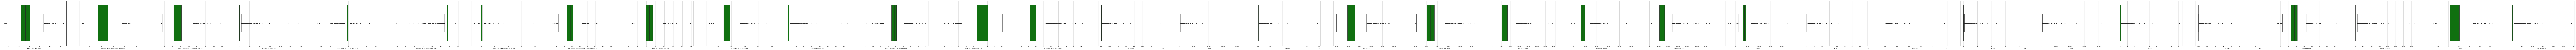

In [ ]:
# Plotting a box plot to show the distribution of quantitative data in a way that facilitates comparisons between variables 
number_of_columns=39
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(500,300))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(x=df[l[i]],y=None,color='green')

The above box plot shows the distribution of quantitative data in a way that facilitates comparisons between the variables. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution. A segment inside the rectangle shows the median and “whiskers” above and below the box show the locations of the minimum and maximum.


Key Inferance:
* In our dataset all the feature columns shows outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

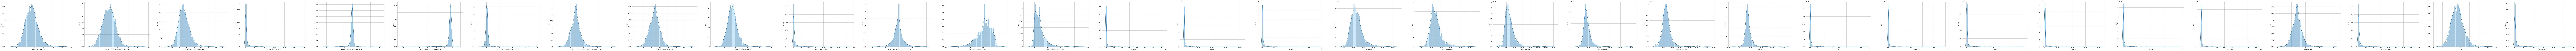

In [ ]:
#Using Kernel density estimate (kde) for plotting the shape of distributions to check the linearity of variables and look for skewness of features
plt.figure(figsize=(500,300))
l=np.array(columns1)
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

Inferances:
* The “Upper 95% Confidence interval”, "Mortality Rates" and "Recent 5-Year Trend (^) in Incidence Rates" columns appear to be normally distributed.
* All other variables are either positively or negatively skewed.

Text(0, 0.5, 'Avg_Ann_Deaths')

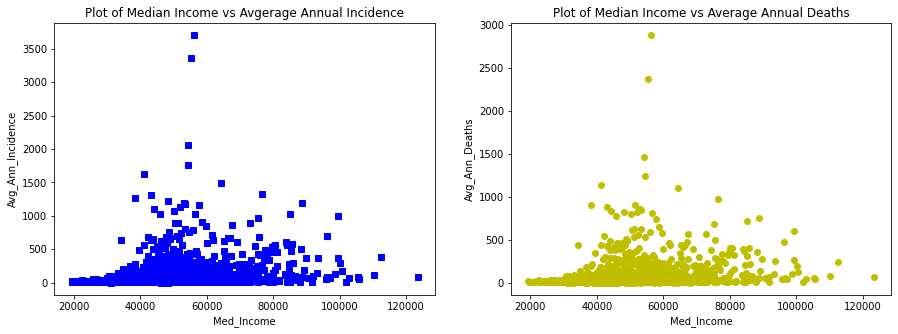

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(df['Med_Income'],df['Avg_Ann_Incidence'],'sb')
plt.title("Plot of Median Income vs Avgerage Annual Incidence")
plt.xlabel('Med_Income')
plt.ylabel('Avg_Ann_Incidence')

plt.subplot(1,2,2)
plt.plot(df['Med_Income'],df['Avg_Ann_Deaths'],'oy')
plt.title("Plot of Median Income vs Average Annual Deaths")
plt.xlabel('Med_Income')
plt.ylabel('Avg_Ann_Deaths')

Inferance:
* Lower the Overall Median Income, higher is the number of average annual deaths. This shows that **"cancer incidence" and "mortality" are correlated with "income levels"**.

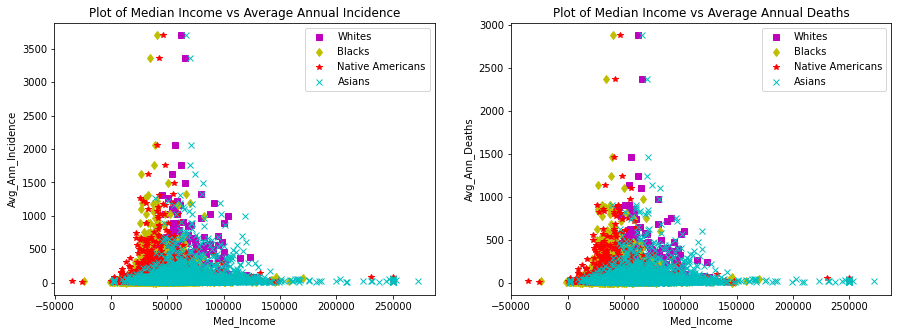

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(df['Med_Income_White'],df['Avg_Ann_Incidence'],'sm')
plt.plot(df['Med_Income_Black'],df['Avg_Ann_Incidence'],'dy')
plt.plot(df['Med_Income_Nat_Am'],df['Avg_Ann_Incidence'],'*r')
plt.plot(df['Med_Income_Asian'],df['Avg_Ann_Incidence'],'xc')
plt.title("Plot of Median Income vs Average Annual Incidence")
plt.xlabel('Med_Income')
plt.ylabel('Avg_Ann_Incidence')
plt.legend(['Whites', 'Blacks','Native Americans','Asians']);

plt.subplot(1,2,2)
plt.plot(df['Med_Income_White'],df['Avg_Ann_Deaths'],'sm')
plt.plot(df['Med_Income_Black'],df['Avg_Ann_Deaths'],'dy')
plt.plot(df['Med_Income_Nat_Am'],df['Avg_Ann_Deaths'],'*r')
plt.plot(df['Med_Income_Asian'],df['Avg_Ann_Deaths'],'xc')
plt.title("Plot of Median Income vs Average Annual Deaths")
plt.xlabel('Med_Income')
plt.ylabel('Avg_Ann_Deaths')
plt.legend(['Whites', 'Blacks','Native Americans','Asians']);

Inferance:
* We see the average incidence and mortality also depends on the kind of ethnic group.
*  Taking any particular value of income, we can infer that the average incidence and mortality **increase** with the type of ethnic group in the order: **Native American, Blacks, Asian, Whites**.

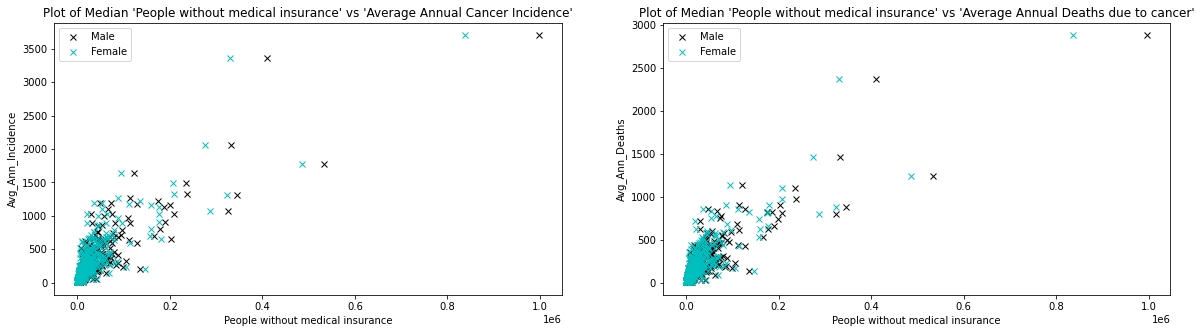

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(df['M_Without'],df['Avg_Ann_Incidence'],'xk')
plt.plot(df['F_Without'],df['Avg_Ann_Incidence'],'xc')
plt.title("Plot of Median 'People without medical insurance' vs 'Average Annual Cancer Incidence'")
plt.xlabel('People without medical insurance')
plt.ylabel('Avg_Ann_Incidence')
plt.legend(['Male','Female']);

plt.subplot(1,2,2)
plt.plot(df['M_Without'],df['Avg_Ann_Deaths'],'xk')
plt.plot(df['F_Without'],df['Avg_Ann_Deaths'],'xc')
plt.title("Plot of Median 'People without medical insurance' vs 'Average Annual Deaths due to cancer'")
plt.xlabel('People without medical insurance')
plt.ylabel('Avg_Ann_Deaths')
plt.legend(['Male','Female']);

Inferance:
* We see the average incidence and mortality also depends on the gender.
*  Taking any particular value of "number of people of the considered gender without medical insurance", we can infer that the **average incidence and mortality of male is greater than that of female**.

#####**To use linear regression for modelling, it is necessary to remove correlated variables to improve our model.**

In [ ]:
#Finding correlations in the data using the pandas “.corr()” function
corr_matrix = df.corr()
corr_matrix

,Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,All_Poverty,M_Poverty,F_Poverty,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Mortality_Rate,Avg_Ann_Deaths,Upper 95% Confidence Interval for Trend
Age-Adjusted Death Rate,1.000000,0.921726,0.915545,-0.128972,0.281937,0.216251,0.177037,0.858523,0.770062,0.816970,-0.141271,0.006885,-0.064839,0.040940,-0.147215,-0.147927,-0.146557,-0.445147,-0.430299,-0.310987,-0.193701,0.181828,-0.116994,-0.190096,-0.152079,-0.187369,-0.151540,-0.188701,-0.151910,0.858078,-0.141303,1.000000,-0.128972,0.167922
Lower 95% Confidence Interval for Death Rate,0.921726,1.000000,0.689407,0.051318,0.211606,0.226129,0.056075,0.810321,0.866192,0.619015,0.037707,-0.013116,0.135600,-0.164309,-0.018594,-0.020533,-0.016981,-0.317810,-0.301866,-0.252952,-0.151447,0.139675,-0.103224,-0.039867,-0.038895,-0.037100,-0.039353,-0.038431,-0.039128,0.808705,0.036473,0.921726,0.051318,0.050797
Upper 95% Confidence Interval for Death Rate,0.915545,0.689407,1.000000,-0.275991,0.304324,0.169470,0.267495,0.766304,0.544104,0.888226,-0.284998,0.025954,-0.256840,0.243932,-0.243517,-0.242993,-0.243840,-0.498569,-0.487847,-0.320162,-0.207454,0.196142,-0.111663,-0.299994,-0.233298,-0.297619,-0.232055,-0.298797,-0.232847,0.767257,-0.283748,0.915545,-0.275991,0.255551
Average Deaths per Year,-0.128972,0.051318,-0.275991,1.000000,-0.148568,-0.029171,-0.200767,-0.093604,0.076459,-0.247972,0.996833,-0.043452,0.272794,-0.263261,0.911851,0.909499,0.913381,0.243006,0.291052,0.079755,0.026668,0.006971,0.057342,0.953592,0.871963,0.957421,0.856536,0.955712,0.865290,-0.094033,0.994670,-0.128972,1.000000,-0.199850
Recent 5-Year Trend (2) in Death Rates,0.281937,0.211606,0.304324,-0.148568,1.000000,0.824377,0.550131,0.249204,0.180130,0.284423,-0.150487,0.092900,0.002176,0.084126,-0.131076,-0.131199,-0.130914,-0.194574,-0.208646,-0.207768,-0.140486,0.121251,-0.136888,-0.159329,-0.133764,-0.158107,-0.134236,-0.158714,-0.134054,0.249558,-0.148837,0.281937,-0.148568,0.548112
Lower 95% Confidence Interval for Trend,0.216251,0.226129,0.169470,-0.029171,0.824377,1.000000,-0.010063,0.183527,0.190630,0.149079,-0.031506,0.080422,0.106880,-0.026539,-0.041030,-0.041919,-0.040275,-0.079491,-0.086717,-0.125159,-0.075742,0.029392,-0.067127,-0.050896,-0.048269,-0.050092,-0.048692,-0.050484,-0.048490,0.183666,-0.030613,0.216251,-0.029171,-0.010074
Upper 95% Confidence Interval for Trend,0.177037,0.056075,0.267495,-0.200767,0.550131,-0.010063,1.000000,0.167621,0.052005,0.262964,-0.200863,0.036557,-0.125533,0.152457,-0.159087,-0.158183,-0.159763,-0.208835,-0.224823,-0.177412,-0.132161,0.172712,-0.137134,-0.191163,-0.154993,-0.190280,-0.155409,-0.190728,-0.155268,0.168037,-0.199348,0.177037,-0.200767,0.998874
"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",0.858523,0.810321,0.766304,-0.093604,0.249204,0.183527,0.167621,1.000000,0.931050,0.917028,-0.093764,0.051296,0.020250,-0.001050,-0.128479,-0.129611,-0.127484,-0.366545,-0.368733,-0.287710,-0.184353,0.238878,-0.103853,-0.158751,-0.138279,-0.155929,-0.139373,-0.157302,-0.138858,0.999369,-0.093995,0.858523,-0.093604,0.159978
Lower 95% Confidence Interval,0.770062,0.866192,0.544104,0.076459,0.180130,0.190630,0.052005,0.931050,1.000000,0.714606,0.076286,0.030477,0.206792,-0.192935,-0.005830,-0.008175,-0.003885,-0.237061,-0.237257,-0.227025,-0.138213,0.193255,-0.085086,-0.015041,-0.029900,-0.012140,-0.031945,-0.013532,-0.030862,0.931175,0.075

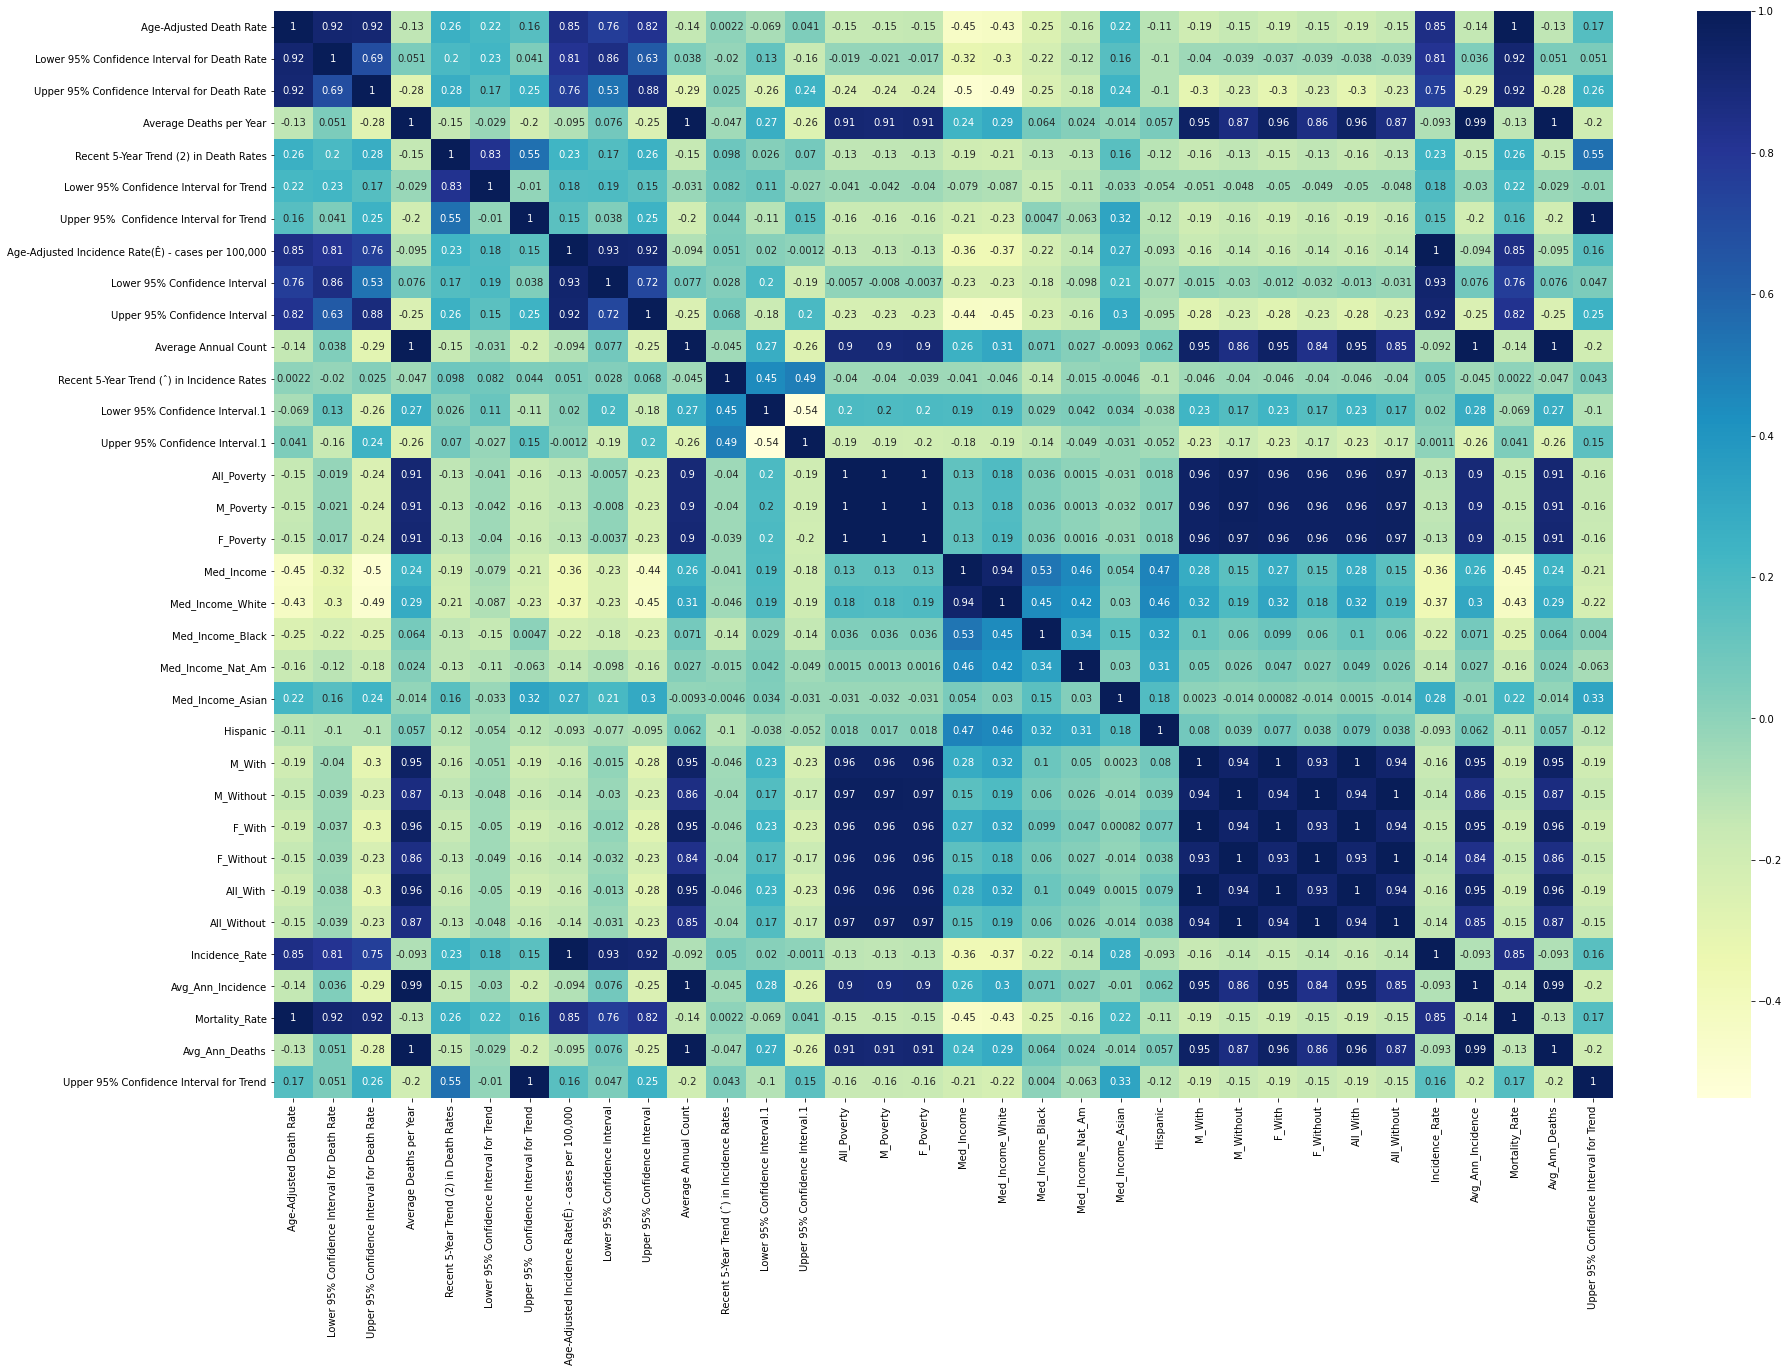

In [ ]:
#Visualizing the correlation matrix using a heatmap in seaborn
plt.figure(figsize=(30,20))
sns.heatmap(corr_matrix, cmap='YlGnBu',annot=True)

In [ ]:
for i in columns1:
 print(i,"is in high correlation with: ", end="" )
 for j in columns1:
   if corr_matrix[i][j]>=0.9:
     if i!=j:
      print(j,",",end="")
 print("\n")

Age-Adjusted Death Rate is in high correlation with: Lower 95% Confidence Interval for Death Rate ,Upper 95% Confidence Interval for Death Rate ,Mortality_Rate ,

Lower 95% Confidence Interval for Death Rate is in high correlation with: Age-Adjusted Death Rate ,Mortality_Rate ,

Upper 95% Confidence Interval for Death Rate is in high correlation with: Age-Adjusted Death Rate ,Mortality_Rate ,

Average Deaths per Year is in high correlation with: Average Annual Count ,All_Poverty ,M_Poverty ,F_Poverty ,M_With ,F_With ,All_With ,Avg_Ann_Incidence ,Avg_Ann_Deaths ,

Recent 5-Year Trend (2) in Death Rates is in high correlation with: 

Lower 95% Confidence Interval for Trend is in high correlation with: 

Upper 95%  Confidence Interval for Trend is in high correlation with: 

Age-Adjusted Incidence Rate(Ê) - cases per 100,000 is in high correlation with: Lower 95% Confidence Interval ,Upper 95% Confidence Interval ,Incidence_Rate ,

Lower 95% Confidence Interval is in high correlation with

The above will be used to remove correlated variables during the feature selection decision for the linear model.

#Building the Linear Regression Model

In [120]:
# Importing the required libraries
import torch.nn as nn
import torch.nn.functional as F
import sklearn
from sklearn.model_selection import train_test_split

In [121]:
df.columns

Index(['AreaName', 'Met Objective of 45.5? (1)', 'Age-Adjusted Death Rate',
       'Lower 95% Confidence Interval for Death Rate',
       'Upper 95% Confidence Interval for Death Rate',
       'Average Deaths per Year', 'Recent Trend (2)',
       'Recent 5-Year Trend (2) in Death Rates',
       'Lower 95% Confidence Interval for Trend',
       'Upper 95%  Confidence Interval for Trend',
       'Age-Adjusted Incidence Rate(Ê) - cases per 100,000',
       'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval',
       'Average Annual Count', 'Recent Trend',
       'Recent 5-Year Trend (ˆ) in Incidence Rates',
       'Lower 95% Confidence Interval.1', 'Upper 95% Confidence Interval.1',
       'All_Poverty', 'M_Poverty', 'F_Poverty', 'Med_Income',
       'Med_Income_White', 'Med_Income_Black', 'Med_Income_Nat_Am',
       'Med_Income_Asian', 'Hispanic', 'M_With', 'M_Without', 'F_With',
       'F_Without', 'All_With', 'All_Without', 'Incidence_Rate',
       'Avg_Ann_Incidence', 'rec

In [122]:
df_input=df[['M_Poverty', 'F_Poverty', 'Med_Income', 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic','Met Objective of 45.5? (1)' ]] #list of input feauture columns

In [123]:
df_output=df[['Avg_Ann_Incidence', 'Avg_Ann_Deaths']] #list of output feature columns

In [124]:
val_size=556
train_size=len(df)-val_size

In [125]:
inputs=[]
outputs=[]
for i in range(0,2756):
  list1=(df_input.iloc[i]).values
  inputs.append(list1)
  list2=(df_output.iloc[i]).values
  outputs.append(list2)

import torch 

inputs=np.array(inputs,dtype='float32')
inputs = torch.from_numpy(inputs)

outputs=np.array(outputs,dtype='float32')
outputs = torch.from_numpy(outputs)

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

ds = TensorDataset(inputs, outputs)
from torch.utils.data import random_split
train_ds, val_ds = random_split(ds, [train_size, val_size])

# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True,num_workers=2)
val_dl = DataLoader(val_ds, batch_size, shuffle=True,num_workers=2)

In [126]:
len(train_ds)

2200

In [127]:
len(val_ds)

556

In [128]:
inputs.shape

torch.Size([2756, 9])

In [129]:
outputs.shape

torch.Size([2756, 2])

In [130]:
#Defining the model
model = nn.Linear(9, 2)

#Printing the initialized parameters
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.0037, -0.0768,  0.2976,  0.1994, -0.2187, -0.2290, -0.1812, -0.3179,
         -0.3188],
        [-0.0382,  0.1234,  0.2052, -0.0491,  0.2671,  0.0465, -0.0581, -0.0911,
          0.0753]], requires_grad=True)
Parameter containing:
tensor([-0.0743, -0.3081], requires_grad=True)


In [131]:
# Generating the predictions
preds = model(inputs)
preds

tensor([[-51658.6680,  19272.1445],
        [-33792.6289,   3137.1140],
        [-49546.0156,  26715.5996],
        ...,
        [-22982.1602,  19785.6504],
        [-15899.0938,  19641.1426],
        [-21200.1836,  11405.8301]], grad_fn=<AddmmBackward>)

In [132]:
# Defining the loss function
loss_fn = F.mse_loss

In [133]:
loss = loss_fn(model(inputs), outputs)
print(loss)

tensor(3.3344e+08, grad_fn=<MseLossBackward>)


In [219]:
# Defining the optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-12)

###Training the model:

In [231]:
#Defining the utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
            print(model.weight)
            print(model.bias)
            print('\n')

In [232]:
fit(80, model, loss_fn, opt, train_dl) #fitting the model to the data

Epoch [10/80], Loss: 3402.5210
Parameter containing:
tensor([[-8.9407e-03,  1.2116e-02,  2.3080e-03, -4.4298e-04, -3.5505e-04,
         -4.2570e-04, -1.4140e-04, -2.9223e-04, -3.1878e-01],
        [-6.6310e-03,  8.9926e-03,  1.5686e-03, -2.8487e-04, -2.7828e-04,
         -2.8043e-04, -8.4898e-05, -1.8494e-04,  7.5317e-02]],
       requires_grad=True)
Parameter containing:
tensor([-0.0743, -0.3081], requires_grad=True)


Epoch [20/80], Loss: 2782.4021
Parameter containing:
tensor([[-9.0232e-03,  1.2018e-02,  2.2874e-03, -4.6905e-04, -3.6827e-04,
         -4.3994e-04, -1.6132e-04, -3.0761e-04, -3.1878e-01],
        [-6.6640e-03,  8.9253e-03,  1.5574e-03, -2.9790e-04, -2.8459e-04,
         -2.8719e-04, -9.4080e-05, -1.9258e-04,  7.5317e-02]],
       requires_grad=True)
Parameter containing:
tensor([-0.0743, -0.3081], requires_grad=True)


Epoch [30/80], Loss: 547.8799
Parameter containing:
tensor([[-9.0194e-03,  1.2028e-02,  2.3037e-03, -4.5399e-04, -3.5888e-04,
         -4.2763e-04, -1.4

In [233]:
model.weights=torch.from_numpy(np.array([[-9.0028e-03,  1.2061e-02,  2.2993e-03, -4.6455e-04, -3.6760e-04,
         -4.3513e-04, -1.5426e-04, -3.0385e-04, -3.1878e-01],
        [-6.5910e-03,  8.8842e-03,  1.5576e-03, -2.9469e-04, -2.8690e-04,
         -2.8817e-04, -9.4552e-05, -1.9285e-04,  7.5317e-02]]))

##Performance of the Linear Regression Model

In [234]:
outputs=np.array(outputs)

In [235]:
preds = model(inputs)

In [236]:
Avg_Ann_Incidence_outputs=[]
Avg_Ann_Deaths_outputs=[]
Avg_Ann_Incidence_preds=[]
Avg_Ann_Deaths_preds=[]

for i in range(0,len(outputs)):
  Avg_Ann_Incidence_outputs.append(outputs[i][0])
  Avg_Ann_Deaths_outputs.append(outputs[i][1])

for i in range(0,len(preds)):
  Avg_Ann_Incidence_preds.append(preds[i][0])
  Avg_Ann_Deaths_preds.append(preds[i][1])

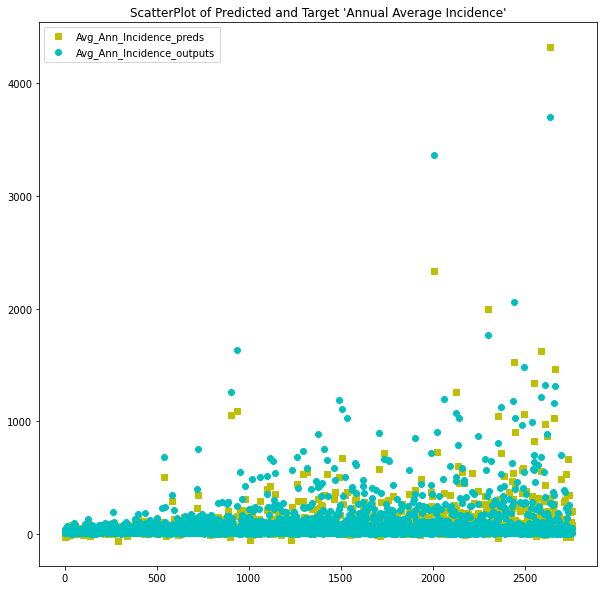

In [246]:
plt.figure(figsize=(10,10))
plt.plot(Avg_Ann_Incidence_preds,'sy')
plt.plot(Avg_Ann_Incidence_outputs, 'oc')
plt.title("ScatterPlot of Predicted and Target 'Annual Average Incidence'")
plt.legend(['Avg_Ann_Incidence_preds','Avg_Ann_Incidence_outputs']);

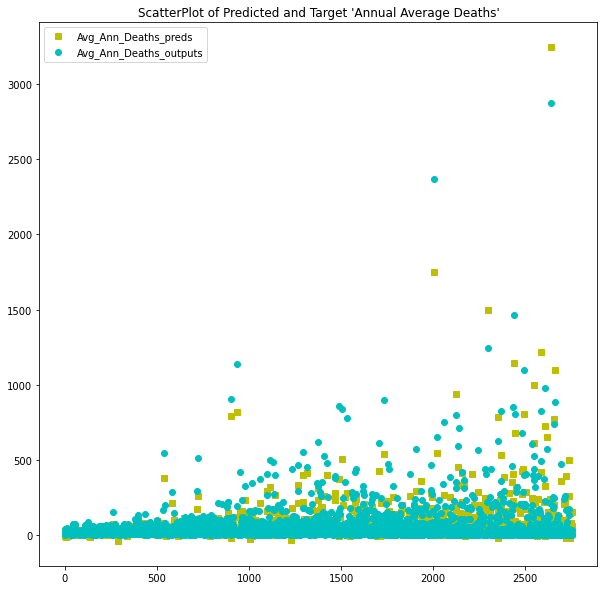

In [247]:
plt.figure(figsize=(10,10))
plt.plot(Avg_Ann_Deaths_preds,'sy')
plt.plot(Avg_Ann_Deaths_outputs, 'oc')
plt.title("ScatterPlot of Predicted and Target 'Annual Average Deaths'")
plt.legend(['Avg_Ann_Deaths_preds','Avg_Ann_Deaths_outputs']);